In [83]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
diet_df = pd.read_csv('diet_history.csv')

In [85]:
diet_df

,week,day,weight,loss,consumed_energy_day,steps_day
0,1,06.07.2025,"129,6 kg","-0,9 kg","2041,00 kcal",NaN
1,2,13.7.2025,"129,3 kg","-0,3 kg","2000,00 kcal",NaN
2,3,20.07.2025,"128,0 kg","-1,3 kg","1900,00 kcal",NaN
3,4,27.7.2025,"127,9 kg","-0,1 kg","2100,00 kcal",NaN
4,5,03.08.2025,"127,2 kg","-0,7 kg","2138,00 kcal","5.937,00"
5,6,10.8.2025,"126,2 kg","-1,0 kg","1908,00 kcal","7.699,00"
6,7,17.08.2025,"125,3 kg","-0,9 kg","2000,00 kcal","8.349,00"
7,8,24.8.2025,"124,3 kg","-1,0 kg","2169,00 kcal","7.961,00"
8,9,31.08.2025,"124,1 kg","-0,2 kg","2322,00 kcal","7.019,00"
9,10,7.9.2025,"123,8 kg","-0,3 kg","2269,00 kcal","8.382,00"


# Data preparation

In [86]:
# drop uneccessary columns
diet_df.drop(columns=["week", "day"],axis=1, inplace=True)
diet_df

,weight,loss,consumed_energy_day,steps_day
0,"129,6 kg","-0,9 kg","2041,00 kcal",NaN
1,"129,3 kg","-0,3 kg","2000,00 kcal",NaN
2,"128,0 kg","-1,3 kg","1900,00 kcal",NaN
3,"127,9 kg","-0,1 kg","2100,00 kcal",NaN
4,"127,2 kg","-0,7 kg","2138,00 kcal","5.937,00"
5,"126,2 kg","-1,0 kg","1908,00 kcal","7.699,00"
6,"125,3 kg","-0,9 kg","2000,00 kcal","8.349,00"
7,"124,3 kg","-1,0 kg","2169,00 kcal","7.961,00"
8,"124,1 kg","-0,2 kg","2322,00 kcal","7.019,00"
9,"123,8 kg","-0,3 kg","2269,00 kcal","8.382,00"


In [87]:
diet_df.dtypes

weight                 object
loss                   object
consumed_energy_day    object
steps_day              object
dtype: object

In [88]:
# clean and convert columns to proper data type
diet_df['steps_day'] = diet_df['steps_day'].apply(lambda x: str(x).replace(".", "").replace(",",".")).astype(float)
diet_df['consumed_energy_day'] = diet_df['consumed_energy_day'].apply(lambda x: str(x).replace("kcal", "").replace(",",".")).astype(float)
diet_df['loss'] = diet_df['loss'].apply(lambda x: str(x).replace("kg", "").replace(",",".")).astype(float)
diet_df['weight'] = diet_df['weight'].apply(lambda x: str(x).replace("kg", "").replace(",",".")).astype(float)

diet_df

,weight,loss,consumed_energy_day,steps_day
0,129.6,-0.9,2041.0,NaN
1,129.3,-0.3,2000.0,NaN
2,128.0,-1.3,1900.0,NaN
3,127.9,-0.1,2100.0,NaN
4,127.2,-0.7,2138.0,5937.0
5,126.2,-1.0,1908.0,7699.0
6,125.3,-0.9,2000.0,8349.0
7,124.3,-1.0,2169.0,7961.0
8,124.1,-0.2,2322.0,7019.0
9,123.8,-0.3,2269.0,8382.0


In [89]:
diet_df.dtypes

weight                 float64
loss                   float64
consumed_energy_day    float64
steps_day              float64
dtype: object

## Select matrices

In [90]:
y = diet_df.iloc[:,1].values
x = diet_df.drop(columns=["loss"]).values
x

array([[ 129.6, 2041. ,    nan],
       [ 129.3, 2000. ,    nan],
       [ 128. , 1900. ,    nan],
       [ 127.9, 2100. ,    nan],
       [ 127.2, 2138. , 5937. ],
       [ 126.2, 1908. , 7699. ],
       [ 125.3, 2000. , 8349. ],
       [ 124.3, 2169. , 7961. ],
       [ 124.1, 2322. , 7019. ],
       [ 123.8, 2269. , 8382. ],
       [ 122.7, 2160. , 8699. ],
       [ 124.8, 2636. , 5640. ],
       [ 125.3, 2723. , 8447. ],
       [ 125.2, 2827. , 7494. ],
       [ 122.5, 1819. , 7129. ],
       [ 121.9, 1800. ,    nan]])

In [91]:
print(y)

[-0.9 -0.3 -1.3 -0.1 -0.7 -1.  -0.9 -1.  -0.2 -0.3 -1.1  2.1  0.5 -0.1
 -2.7 -0.6]


In [92]:
# fill missing data
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=5000)
imputer.fit(x)
x = imputer.transform(x)

print(x)

[[ 129.6 2041.  5000. ]
 [ 129.3 2000.  5000. ]
 [ 128.  1900.  5000. ]
 [ 127.9 2100.  5000. ]
 [ 127.2 2138.  5937. ]
 [ 126.2 1908.  7699. ]
 [ 125.3 2000.  8349. ]
 [ 124.3 2169.  7961. ]
 [ 124.1 2322.  7019. ]
 [ 123.8 2269.  8382. ]
 [ 122.7 2160.  8699. ]
 [ 124.8 2636.  5640. ]
 [ 125.3 2723.  8447. ]
 [ 125.2 2827.  7494. ]
 [ 122.5 1819.  7129. ]
 [ 121.9 1800.  5000. ]]


# 1.2 Check if it is a linear problem

### 1.2.1 weight relation to loss

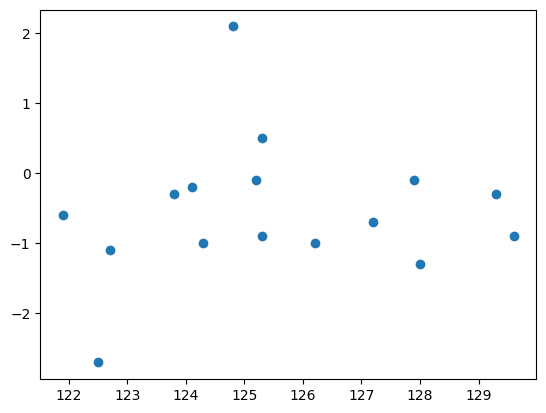

In [93]:
plt.scatter(x[:,0],y)
plt.show()

### 1.2.1 kcal relation to loss

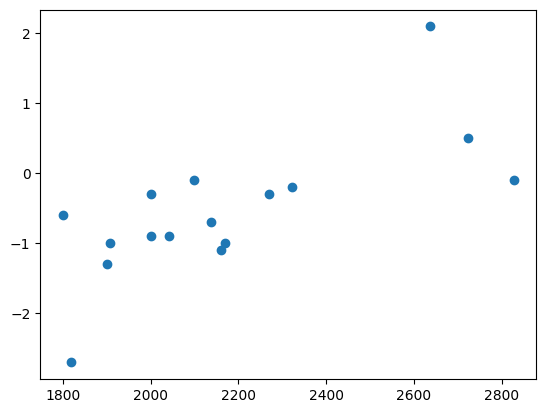

In [94]:
plt.scatter(x[:,1],y)
plt.show()

### 1.2.1 steps relation to loss

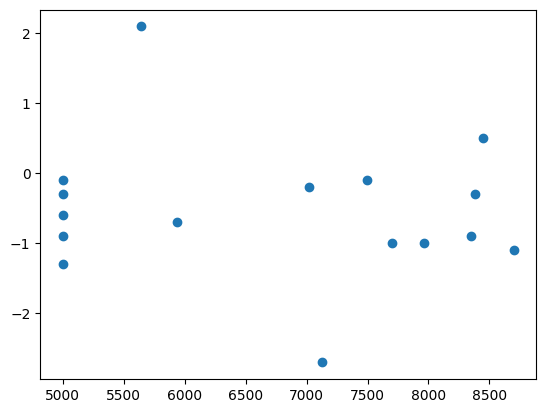

In [95]:
plt.scatter(x[:,2],y)
plt.show()

In [96]:
correlation = pd.DataFrame(x)
correlation['loss'] = y
correlation['weight'] = correlation[0]
correlation['kcal'] = correlation[1]
correlation['steps'] = correlation[2]
correlation.drop(columns=[0,1,2], inplace=True)

correlation = correlation.corr()
print(correlation)

            loss    weight      kcal     steps
loss    1.000000  0.108058  0.709347 -0.128903
weight  0.108058  1.000000 -0.074363 -0.542354
kcal    0.709347 -0.074363  1.000000  0.324247
steps  -0.128903 -0.542354  0.324247  1.000000


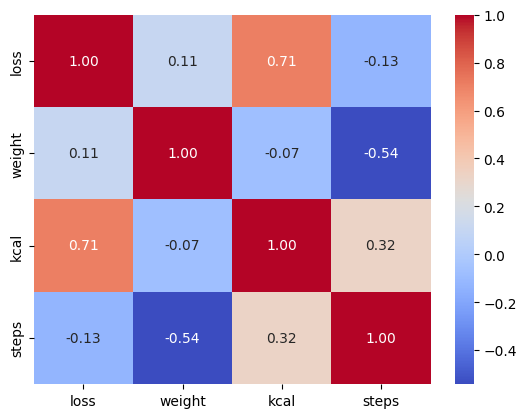

In [97]:
sns.heatmap(correlation,cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

## Split dataset in training and test set


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Feature scaling

In [99]:
feature_scaling = False
if feature_scaling:
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

In [100]:
if feature_scaling:
    print(x_train)

In [101]:
if feature_scaling:
    print(x_test)

## Training

In [102]:
regressor = HuberRegressor()
regressor.fit(x_train, y_train)

,epsilon,1.35
,max_iter,100
,alpha,0.0001
,warm_start,False
,fit_intercept,True
,tol,1e-05


## Prediction

In [103]:
print(x_test)

[[ 129.3 2000.  5000. ]
 [ 125.3 2000.  8349. ]
 [ 124.1 2322.  7019. ]
 [ 123.8 2269.  8382. ]]


In [104]:
y_predicted = regressor.predict(x_test)

comparison = y_predicted.reshape(len(y_predicted),1)
comparison = np.concatenate((comparison,y_test.reshape(len(y_test),1)), axis=1)

print(comparison)

[[-0.70432143 -0.3       ]
 [-1.66141643 -0.9       ]
 [-0.22920672 -0.2       ]
 [-0.82500592 -0.3       ]]


In [105]:
x_example = [
    [121.5,1800, 7000]
]
if feature_scaling:
    x_example = sc.transform(x_example)
y_predicted = regressor.predict(x_example)

print(y_predicted)

[-1.65728862]


In [106]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.03809074  0.00293757 -0.00033128]
0.002071258874033994
